## Цели и задачи проекта

Смоделируем ситуация, где я работаю в интернет-магазине, который продаёт по всему миру компьютерные игры.

__Нужно выявить определяющие успешность игры закономерности,__ чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеем данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 



## Шаг №1. Смотрю, знакомлюсь с данными.

In [1]:
import pandas as pd
import math
import pylab
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
game_df = pd.read_csv(r'C:\Users\Айболит\Desktop\DataFrames\projects\games\games.csv')

In [3]:
game_df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вижу пропуски в названии игры. Их никак не заполнить, всего 2 пропуска, можно смело удалить

In [5]:
game_df.dropna(subset = ['Name'],inplace = True)
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Сразу приведу название столбцов к нижнему регистру

In [6]:
game_df.columns = map(str.lower, game_df.columns)
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [7]:
len(game_df['name'].unique())

11559

11559 уникальных названий игр. Остальные 5тыс.строк - их повторы. Как я могу это использовать? Возможно в повторах имеются заполненные данные, которые пропущены в др.играх с тем же названием. Сохраним уникальные названия в список.

In [8]:
unique_name = game_df['name'].unique()

In [9]:
game_df.duplicated().sum()

0

In [10]:
game_df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [11]:
game_df['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [12]:
game_df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
9.6       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [13]:
game_df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

__Вывод по шагу 1__.

Мы увидели пропуски, большей частью в последних 3х стобцах, отражающийй рейтинг. Сразу, не откладывая, удалили несколько пропусков в столбце название игр. В шаге 2 заполним пропуски в столбце Год_релиза и изменим тип данных на int c float, т.к. год - целочисленное значение и стоит экономить память. Также в столбце "user_score" заметили текст - "tbd", что значит - to be determined, то есть в процессе выставления.



## Шаг №2. Подготовка данных к работе.

#### заполняю пропуски в столбце "Год_релиза"

In [14]:
game_df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [15]:
game_df.query('name == "Super Mario Bros."')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
201,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN


Хотя игры имеют одно название, но на разных платформах год релиза может отличаться более, чем в 10 лет. Поэтому я считаю, чтобы не было искажений, не стоит заполнять год релиза исходя из из подобной игры на другой платформе. 269 строк не имеют заполненные данные относительно года выпуска. Я думаю, что правильнее будет просто удалить их.

In [16]:
game_df.dropna(subset = ['year_of_release'],inplace = True)
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


избавившись от пропусков, теперь можно изменить тип данных на int ради экономии памяти.

In [17]:
game_df['year_of_release'] = game_df['year_of_release'].astype(int)

In [18]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


#### считаю сумму всех продаж и записываю в отдельный датафрейм

In [19]:
regions_sales = pd.DataFrame({'na_total_sales':[game_df['na_sales'].sum()], 
                              'eu_total_sales':[game_df['eu_sales'].sum()], 
                              'jp_total_sales':[game_df['jp_sales'].sum()]})
regions_sales

,na_total_sales,eu_total_sales,jp_total_sales
0,4341.42,2399.68,1290.64


#### аббревиатура "tbd" в столбце "user_score"

In [20]:
tbd_game = game_df.query('user_score == "tbd"')
tbd_game 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [21]:
tbd_game['na_sales'].max()

3.45

In [22]:
game_df['na_sales'].max()

41.36

In [23]:
tbd_game['na_sales'].median()

0.07

In [24]:
game_df['na_sales'].median()

0.08

In [25]:
tbd_game['na_sales'].mean()

0.12553872053871803

In [26]:
game_df['na_sales'].mean()

0.2640124057407166

tbd = to be determined, то есть «подлежащий обсуждению», «подлежащий определению», то есть рейтинг ещё не заполнен, но это уже даёт нам представление, что из океана игр, на них возможно будет указан рейтинг, то есть эти игры замечены.
Также я посмотрел на медиану и среднее в общем датафрейме и срезе среди игр с "tbd", чтобы иметь представление о популярности игр с аббревиатурой "tbd", и сделать вывод о достаточности количества игроков, для получения от них оценки.

чтобы перевести тип данных с object на float и иметь возможность с ними работать, предлагаю заменить tbd на 0. У нас в рейтинге пользователей только 1 игра имеет рейтинг 0, формально рейтинга нет, поэтому - 0.

In [27]:
game_df = game_df.where(game_df != 'tbd', 0)
game_df['user_score'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0      2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
0.3       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Заменил текст на числа, и теперь могу изменить тип данных на практичный и, следовательно, желанный тип float.

In [28]:
game_df['user_score'] = game_df['user_score'].astype('float')

In [29]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


__Вывод по шагу 2__

Решил заменить аббревиатуру "tbd" на 0 (позвольте не повторять обоснование написанное выше (тут должен быть смайлик рук сложенных для молитвы)).

Удалил строки с пропущенными значениями в столбце "год релиза".

Пропуски в последних трёх столбцах считаю заполнять не уместно, т.к. на одну игру, но на разных платформах, могут быть разные рейтинги, т.к. на разных платформах - может отличаться управление, что имеет оптимальное решение для PS3 может плохо выйти при адаптации на РС, также на разных платформах - разные игры, то есть и конкуренция у них разная, что также влияет на оценки. И чтобы не было искажений, предлагаю работать без "туманных", порой надуманных, заполнений.


## Шаг 3. Проведем исследовательский анализ данных

__1.__ 

Далее смотрю на количество игр, выпущенных в разны годы.

In [30]:
year_games = game_df.pivot_table(index=['year_of_release'], values='name', aggfunc='count')
year_games = year_games.reset_index()
year_games.columns = ['year', 'count_of_games']
year_games

,year,count_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Text(0, 0.5, 'количество игр, шт.')

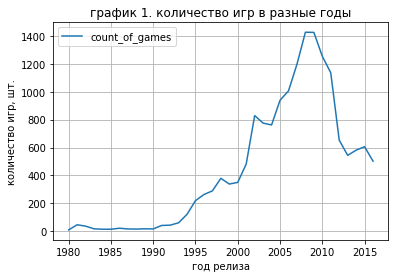

In [31]:
year_games.plot(x='year', y='count_of_games', grid=True, title='график 1. количество игр в разные годы')
plt.xlabel('год релиза')
plt.ylabel('количество игр, шт.')

Мы видим что с 1993 года начинается бурное развтие игровой индустрии, каждый год выпускается больше игр, чем в предыдущий, достигая максимума к 2008 году, когда за год было выпущено 1426 игр, такой же результат и в 2009 году, после чего наблюдается резкий спад производства новых игр и в 2016г объём созданных игр равен объёму 2001 года.

С чем это связано - предположений много. Может создатели не получают желаемую прибыль при высоком предложении, превышающим спрос, может творческий кризис, когда всё новое уже открыто и наполнило рынок, а может пользователь стал уходить на другие платформы, которые здесь не представлены, а за ним и разработчик - в мобильные приложение, онлайн-игры....

Давайте посмотрим топ самых продаваемых, а значит популярных, игр. Просто не терпится узнать их. И проверим есть ли онлайн-игры, такие как Lineage2 или World of Tanks в списке. Думаю рассмотреть 2 спискаа игр - до и после 2000г.

для этого добавим новый столбец в датафрейм - total_sales - который будет показывать сумму всех продаж по конкретной игре на заданную платформу

In [32]:
game_df['total_sales'] = game_df['na_sales'] + game_df['eu_sales'] + game_df['jp_sales'] + game_df['other_sales']

In [33]:
game_df = game_df[['name', 'platform', 'year_of_release', 'genre',
                   'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales',
                   'critic_score', 'user_score', 'rating']]

In [34]:
game_sell = game_df[['name', 'total_sales', 'year_of_release']] 
game_sell.sort_values(['total_sales'], ascending=False).head(10)

,name,total_sales,year_of_release
0,Wii Sports,82.54,2006
1,Super Mario Bros.,40.24,1985
2,Mario Kart Wii,35.52,2008
3,Wii Sports Resort,32.77,2009
4,Pokemon Red/Pokemon Blue,31.38,1996
5,Tetris,30.26,1989
6,New Super Mario Bros.,29.80,2006
7,Wii Play,28.91,2006
8,New Super Mario Bros. Wii,28.32,2009
9,Duck Hunt,28.31,1984


In [35]:
game_sell_after_1995 = game_sell.query('year_of_release >1995')
game_sell_after_1995.sort_values(['total_sales'], ascending=False).head(10)

,name,total_sales,year_of_release
0,Wii Sports,82.54,2006
2,Mario Kart Wii,35.52,2008
3,Wii Sports Resort,32.77,2009
4,Pokemon Red/Pokemon Blue,31.38,1996
6,New Super Mario Bros.,29.80,2006
7,Wii Play,28.91,2006
8,New Super Mario Bros. Wii,28.32,2009
10,Nintendogs,24.67,2005
11,Mario Kart DS,23.21,2005
12,Pokemon Gold/Pokemon Silver,23.09,1999


Онлайн игр нет, а это многомиллионная аудитория игроков.

Вывод - с 95г. до 08 наблюдается рост создания новых игр, 08-09гг. - плато и резкий спад выпуска новых игр на предложенные платформы. 


__2.__ 

Посмотрим, как менялись продажи по платформам. И выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Таким образов определим за какой характерный срок появляются новые и исчезают старые платформы.

делаю сводную таблицу, которая будет содержать информацию по платформам и суммарным продажам всех игр на неё за год, единицы измерения - млн. А также таблицу, которая будет содержать информацию по платформам и средней продажи по игре на неё за год, единицы измерения - млн.

In [36]:
platforms = game_df.pivot_table(index=['platform'], columns=['year_of_release'], values='total_sales', aggfunc='sum')

In [37]:
platforms_mean = game_df.pivot_table(index=['platform'], columns=['year_of_release'], values='total_sales', aggfunc='mean')

In [38]:
platforms

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Хочу визуализировать на графике, поэтому готовлю таблицу для этого - провожу транспонирование.

In [39]:
pd.set_option('display.max_columns', None)
platforms_t = platforms.T
platforms_t = platforms_t.reset_index()
platforms_t.head(3)

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Т.к. не имеет смысла обращать внимание на данные до 1995 года, т.к. малое количество игр, платформ, другая специфика времени, мы оставим только данные с 1995 года.

In [40]:
platforms_t = platforms_t.iloc[15:]

Text(0, 0.5, 'количество проданных игр, млн.')

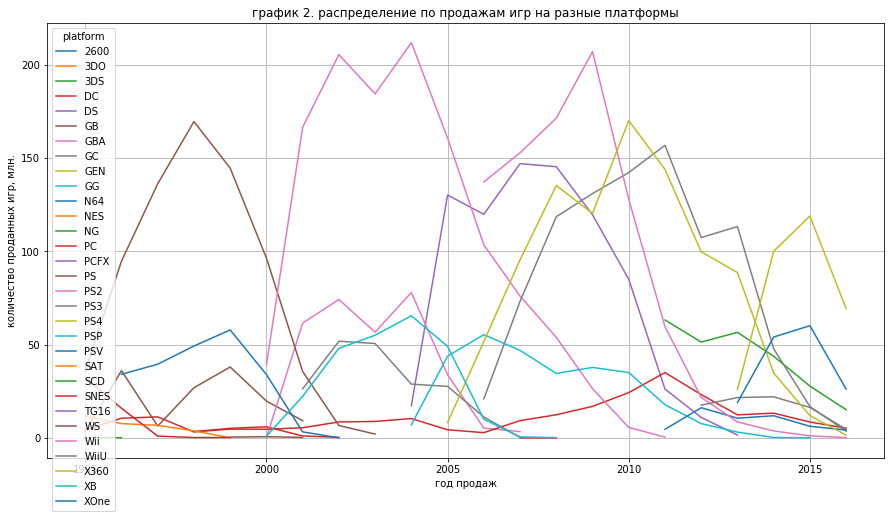

In [41]:
platforms_t.plot(x='year_of_release', grid=True, figsize=(15, 8), title='график 2. распределение по продажам игр на разные платформы')
plt.xlabel('год продаж')
plt.ylabel('количество проданных игр, млн.')


Вполне логичный и ожидаемы график. Количество платформ увеличивается, количество игр ещё быстрее увеличивается (увидели на прошлом графике, но рост до 2008, потом спад и тут та же тенденция, графики сходятся - до 2009 рост продаж, потом спад), население растет, растут продажи  до 2008, поэтому и график растёт до 2009, а потом наблюдаем спад производства новых игр, видимо причины снижения выпуска новых игр и снижение продаж имеют общие причины.

Также видим, что по всем платформам пики продаж игр совпадают или смещены друг от друга +/- 1 год.

Далее давайте посмотрим на средние продажи игр по платформам.

In [42]:
platforms_mean = game_df.pivot_table(index=['platform'], columns=['year_of_release'], values='total_sales', aggfunc='mean')

In [43]:
platforms_mean_t = platforms_mean.T
platforms_mean_t = platforms_mean_t.reset_index()
platforms_mean_t.head(2)

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980,1.264444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,0.775652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'среднее по проданным играм, млн.')

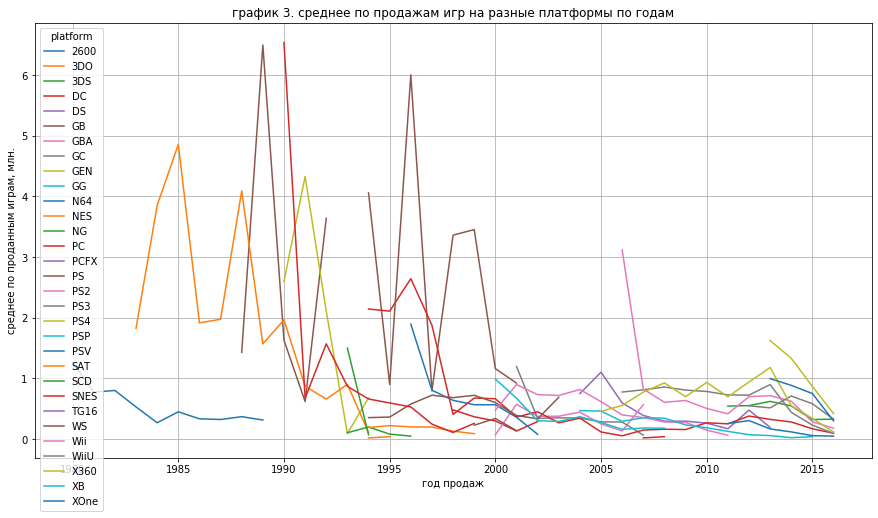

In [44]:
platforms_mean_t.plot(x='year_of_release', grid=True, figsize=(15, 8), title='график 3. среднее по продажам игр на разные платформы по годам')
plt.xlabel('год продаж')
plt.ylabel('среднее по проданным играм, млн.')


И тут ожидаемо. До 2000 игр было немного, внимание покупателей было сконцентрировано на <350 играх, соответственно рост кол-ва новых игр снижает покупаемость одной игры. Грубо говоря - у нас есть 1 игра - все ее покупают, когда их 10, то покупательская способность делится на 10 между этими играми.

Далее определяю время "жизни" платформы в годах.


In [45]:
platforms_88 = platforms_t.where(platforms_t >=0, 88)

In [46]:
platforms_88.head(11)

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
15,1995,88.0,0.08,88.0,88.00,88.00,3.60,88.00,88.00,88.0,88.0,88.00,88.0,0.33,4.22,88.00,35.96,88.00,88.0,88.0,88.00,88.0,11.57,88.0,32.20,0.16,88.00,88.0,88.0,88.00,88.00,88.0
16,1996,88.0,88.00,88.0,88.00,88.00,36.03,88.00,88.00,88.0,88.0,34.10,88.0,0.10,10.58,0.03,94.70,88.00,88.0,88.0,88.00,88.0,7.69,88.0,15.92,88.00,88.00,88.0,88.0,88.00,88.00,88.0
17,1997,88.0,88.00,88.0,88.00,88.00,6.37,88.00,88.00,88.0,88.0,39.50,88.0,88.00,11.27,88.00,136.17,88.00,88.0,88.0,88.00,88.0,6.77,88.0,0.99,88.00,88.00,88.0,88.0,88.00,88.00,88.0
18,1998,88.0,88.00,88.0,3.38,88.00,26.90,88.00,88.00,88.0,88.0,49.24,88.0,88.00,3.26,88.00,169.49,88.00,88.0,88.0,88.00,88.0,3.82,88.0,0.22,88.00,88.00,88.0,88.0,88.00,88.00,88.0
19,1999,88.0,88.00,88.0,5.16,88.00,38.00,88.00,88.00,88.0,88.0,57.87,88.0,88.00,4.74,88.00,144.53,88.00,88.0,88.0,88.00,88.0,0.09,88.0,0.26,88.00,0.46,88.0,88.0,88.00,88.00,88.0
20,2000,88.0,88.00,88.0,5.99,88.00,19.76,0.07,88.00,88.0,88.0,33.97,88.0,88.00,4.66,88.00,96.37,39.17,88.0,88.0,88.00,88.0,88.00,88.0,88.00,88.00,0.68,88.0,88.0,88.00,0.99,88.0
21,2001,88.0,88.00,88.0,1.07,88.00,9.24,61.53,26.34,88.0,88.0,3.25,88.0,88.00,5.47,88.00,35.59,166.43,88.0,88.0,88.00,88.0,88.00,88.0,88.00,88.00,0.28,88.0,88.0,88.00,22.26,88.0
22,2002,88.0,88.00,88.0,0.29,88.00,88.00,74.16,51.81,88.0,88.0,0.08,88.0,88.00,8.57,88.00,6.67,205.38,88.0,88.0,88.00,88.0,88.00,88.0,88.00,88.00,88.00,88.0,88.0,88.00,48.01,88.0
23,2003,88.0,88.00,88.0,88.00,88.00,88.00,56.67,50.61,88.0,88.0,88.00,88.0,88.00,8.84,88.00,2.07,184.31,88.0,88.0,88.00,88.0,88.00,88.0,88.00,88.00,88.00,88.0,88.0,88.00,55.04,88.0
24,2004,88.0,88.00,88.0,88.00,17.27,88.00,77.91,28.82,88.0,88.0,88.00,88.0,88.00,10.39,88.00,88.00,211.81,88.0,88.0,7.06,88.0,88.00,88.0,88.00,88.00,88.00,88.0,88.0,88.00,65.42,88.0


заменил NaN на 88, это достаточно большое число, все остальные меньше него, чтобы заменить оставшиеся числа на 1, и вернуть 88 к 0.

In [47]:
platforms_0 = platforms_88.where(platforms_88 ==88, 1)

In [48]:
platforms_1 = platforms_0.where(platforms_0 < 87, 0)

In [49]:
platforms_1.head()

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
15,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


каждая строка - год, каждый столбец - платформа, теперь суммируя значения по столбцу - я получаю годы жизни платформы.

In [50]:
age_of_platforms = platforms_1.apply(np.sum, axis=0)

In [51]:
age_of_platforms = pd.DataFrame(age_of_platforms)
age_of_platforms = age_of_platforms.reset_index()
age_of_platforms.columns = ['platform','years_of_life']
age_of_platforms

,platform,years_of_life
0,year_of_release,22.0
1,2600,0.0
2,3DO,1.0
3,3DS,6.0
4,DC,7.0
5,DS,10.0
6,GB,7.0
7,GBA,8.0
8,GC,7.0
9,GEN,0.0


Мы увидели количество лет, которые проживают разные платформы. Песональный компьютер - PC явно выходит из общего распределения, и ПК (РС) - это особый случай, он будет жить как игровая платформа всегда. Поэтому его стоит убрать при расчёте средней продолжительности "жизни" платформы сразу, как "выброс".

In [52]:
age_of_platforms = age_of_platforms.drop([0, 14])

Text(0.5, 1.0, 'график 4. гистограмма распределения "продолжительности жизни" платформ')

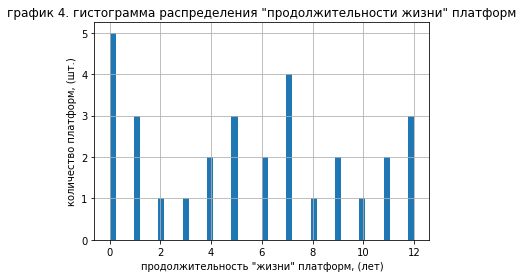

In [53]:
age_of_platforms.hist(bins=50)
plt.xlabel('продолжительность "жизни" платформ, (лет)')
plt.ylabel('количество платформ, (шт.)')
plt.title('график 4. гистограмма распределения "продолжительности жизни" платформ')

In [54]:
age_of_platforms['years_of_life'].median()

5.5

In [55]:
age_of_platforms['years_of_life'].mean()

5.5

Среднее время "жизни" платформы = 7 лет. Но т.к. наши данные ограничены 2016 годом, то некоторые платформы, ещё живые, записываются в "умершие", стоит их убрать из списка, этo 9 платформ (посчитал количество линий на графике№2 между 15 и 16 годами).


In [56]:
plarforms_res_i = platforms.reset_index()
plarforms_2016 = plarforms_res_i[['platform', 2016]]


In [57]:
plarforms_2016 = plarforms_2016.dropna()

In [58]:
plarforms_2016

year_of_release,platform,2016
2,3DS,15.14
13,PC,5.25
17,PS3,3.60
18,PS4,69.25
20,PSV,4.25
26,Wii,0.18
27,WiiU,4.60
28,X360,1.52
30,XOne,26.15


Теперь давайте удалим эти 9 платформ из таблицы (ПК мы уже удалили), т.к. не знаем наверняка сколько они проживут ещё.

In [59]:
age_of_platforms = age_of_platforms.drop([3, 18, 19, 21, 27, 28, 29, 31])
age_of_platforms

,platform,years_of_life
1,2600,0.0
2,3DO,1.0
4,DC,7.0
5,DS,10.0
6,GB,7.0
7,GBA,8.0
8,GC,7.0
9,GEN,0.0
10,GG,0.0
11,N64,7.0


Text(0.5, 1.0, 'график 5 (модифицированный 4). гистограмма распределения "продолжительности жизни" платформ')

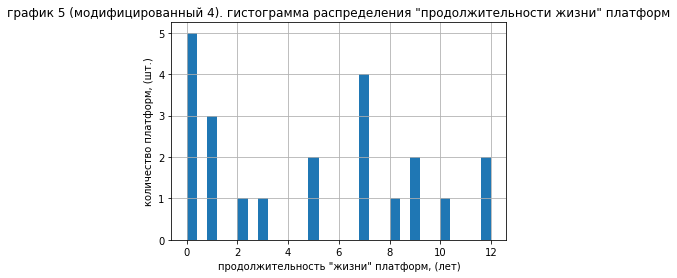

In [60]:
age_of_platforms.hist(bins=30)
plt.xlabel('продолжительность "жизни" платформ, (лет)')
plt.ylabel('количество платформ, (шт.)')
plt.title('график 5 (модифицированный 4). гистограмма распределения "продолжительности жизни" платформ')

In [61]:
age_of_platforms['years_of_life'].describe()

count    22.000000
mean      4.818182
std       4.170604
min       0.000000
25%       1.000000
50%       5.000000
75%       7.750000
max      12.000000
Name: years_of_life, dtype: float64

__Вывод__

Среднее время жизни платформы - 7 лет. Актуальный период - не ранее 2000 года. На данном этапе анализа, чтобы не упустить ничего, считаю нужным принять за актуальный период - время с 2000 до 2016. График 1, 2 и 3 - чётко нам это показывают, что историю игровой индустрии можно разделить на 2 эпохи - до и после 2000. После 2000 график меняет тенденции и формы, сохраняя постоянство.


__3.__

Далее я выберу платформы с наибольшими суммарными продажами и построю распределение по годам. Отвечу на вопрос - за какой характерный срок появляются новые и исчезают старые платформы

определяю самые популярные платформы, для этого просто группирую данны по платформам, складывая продажи всех игр за все годы их жизни. Смотрю 2 варианта - за все время и за "актуальный период"

In [62]:
top_platform_of_sales = game_df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
top_platform_of_sales.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


максимум продаж на следующие платформы:

PS2, X360, PS3, Wii, DS, PS, PS4

Но необходимо включить и XOne, т.к. на период 2014-2016 она единственный конкурент PS4.

Посмотрим на продажи для этих платформ по годам.



In [63]:
top_platforms = platforms.T
col_list = ['PS2','X360','PS3','Wii','DS','PS','PS4', 'XOne']
top_platforms = top_platforms[col_list]
top_platforms = top_platforms.iloc[14:]

In [64]:
top_platforms

platform,PS2,X360,PS3,Wii,DS,PS,PS4,XOne
year_of_release,,,,,,,,
1994,NaN,NaN,NaN,NaN,NaN,6.03,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,35.96,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,94.70,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,136.17,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,169.49,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,144.53,NaN,NaN
2000,39.17,NaN,NaN,NaN,NaN,96.37,NaN,NaN
2001,166.43,NaN,NaN,NaN,NaN,35.59,NaN,NaN
2002,205.38,NaN,NaN,NaN,NaN,6.67,NaN,NaN


Text(0, 0.5, 'количество проданных игр, млн.')

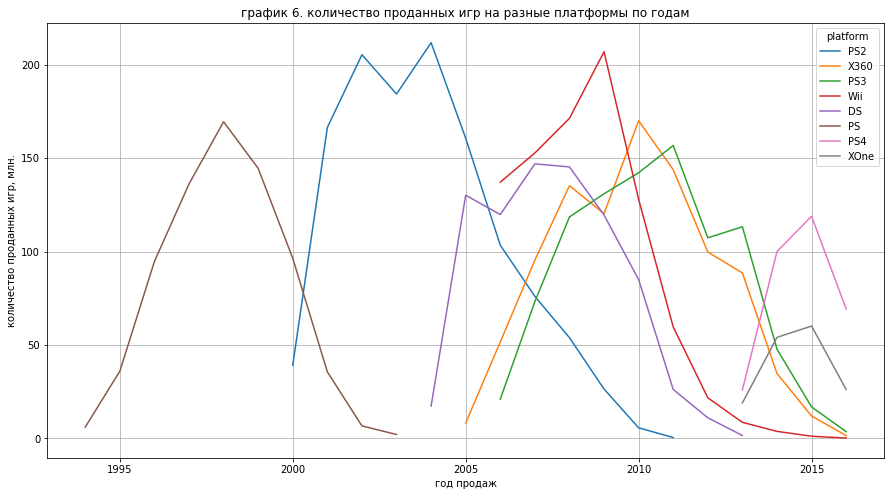

In [65]:
top_platforms.plot(grid=True, figsize=(15, 8), title='график 6. количество проданных игр на разные платформы по годам')
plt.xlabel('год продаж')
plt.ylabel('количество проданных игр, млн.')


In [66]:
top_platforms_mean = platforms_mean.T
col_list = ['PS2','X360','PS3','Wii','DS','PS','PS4', 'XOne']
top_platforms_mean = top_platforms_mean[col_list]
top_platforms_mean = top_platforms_mean.iloc[14:]

Text(0, 0.5, 'количество проданных игр, млн.')

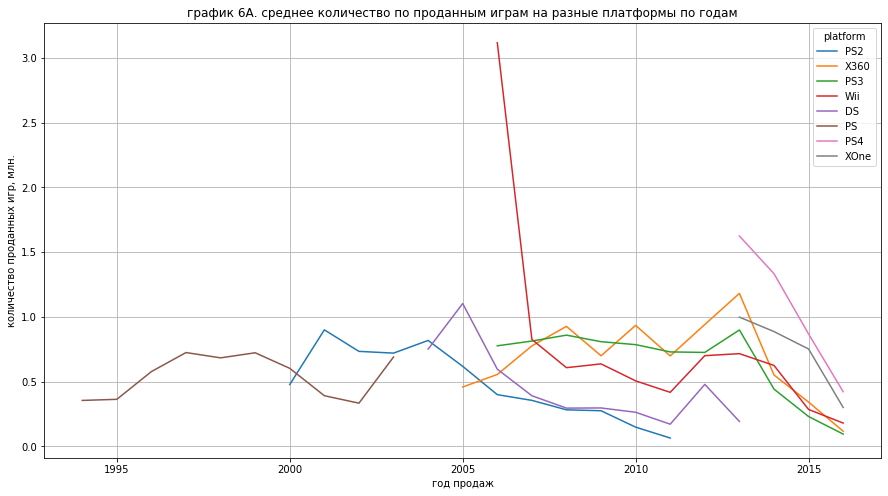

In [67]:
top_platforms_mean.plot(grid=True, figsize=(15, 8), title='график 6A. среднее количество по проданным играм на разные платформы по годам')
plt.xlabel('год продаж')
plt.ylabel('количество проданных игр, млн.')

По графику мы видим, что рекорд или рекорды достигаются на 2-3 годы "жизни" платформы. До 5-6 года идут максимум продаж и с 6го года начинается резкий спад продаж. Если исключить плаформу Wii, которую вытеснили Х360 и PS3, то спад начинается с появлением новой консоли и ростом продаж игр для новой консоли.

Пристальнее посмотрим на события "актуального периода", то есть 2000-2016 и соотнесм с имеющимися выводами.

Далее я повторяю уже проделанное, только выделяю период с 2000 г.

In [68]:
actual_time = platforms_t.iloc[20:]
actual_time

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
35,2015,NaN,NaN,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.52,NaN,NaN,NaN,16.82,118.90,0.12,6.25,NaN,NaN,NaN,NaN,NaN,1.14,16.35,11.96,NaN,60.14
36,2016,NaN,NaN,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,NaN,NaN,NaN,3.60,69.25,NaN,4.25,NaN,NaN,NaN,NaN,NaN,0.18,4.60,1.52,NaN,26.15


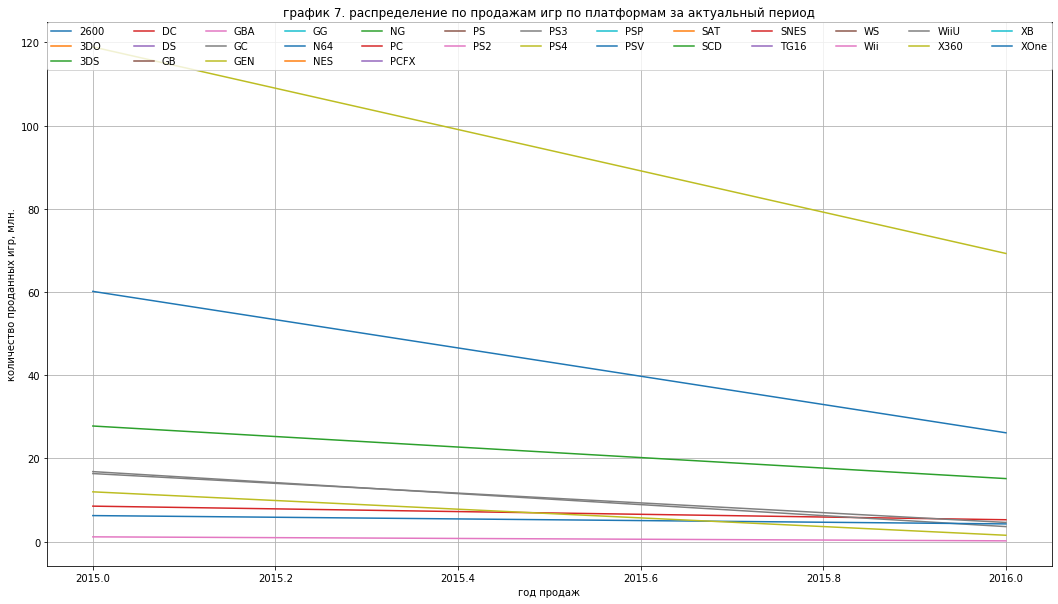

In [69]:
actual_time.plot(x='year_of_release', grid=True, figsize=(18, 10), title='график 7. распределение по продажам игр по платформам за актуальный период')
plt.xlabel('год продаж')
plt.ylabel('количество проданных игр, млн.')
pylab.legend (loc=u'upper center',
                  mode='expand',
                  borderaxespad=0,
                  ncol=13)

__Вывод__

График нам даёт понимание, что есть популярные платформы, есть платформы,которые пользовались популярностью с первого года создания, но уступили (Wii, пользовшаяся популярностью, но уступила ровесникам - Х360 и PS3, стартовавшим с ней примерно в одно время) и не смогли больше подняться в том числе и новое поколение того же производителя (тут я имею ввиду WiiU). Видим, что резкий спад продаж и уход с рынка у платформ начинается с появлением новых платформ. Пик продаж на все платформы (исключение - PC) приходится на 2-3 года их "жизни". С 5-6 года начинается резкий спад в популярности. Исключение составляет - Персональный Компьютер, оно и понятно, он вечный, на него не было громких пиков и провальных регрессий(ровно держитсяя на своём уровне = 10-30 млн.). На 2016 год упали продажи игр для всех платформ. Но вспомним предыдущие выводы - создание новых игр остановило рост в 2008 году, а с 2009 года начало уменьшаться, резко упав после 2011.

Приходим к пониманию, что актуальный период стоит сократить до периода с 2013г., т.к. предыдущие платформы ушли с рынка, а новые определяют дальнейшее течение, основанное на принципах прошлых лет.

Лидирующие платформы за период с 2014 - PS4 - бесспорный лидер с отрывом, далее с аналогичным графиком, но с меньшими продажами - XOne, уступает 6-летняя 3DS. Но продажи игр на эти платформы падают к 2016 году, т.к. я имею данные до декабря 2016 года, не хватает 1 месяца до завершения цикла, я не могу чётко  сказать, что продажи за декабрь достигнут 70 и 50 млн проданного товара для PS4 и XOne соответственно, что позволит им выйти на уровень 2015 года или превысить 70 и 50 млн, чтобы превысить продажи 2015 года, поэтому я говорю, что продажи имеют не просто тенденцию падать, а падают.


Построим график «ящик с усами» по глобальным продажам каждой игры с разбивкой по платформам. Оценим разницу в продажах, средние продажи на разные платформы.

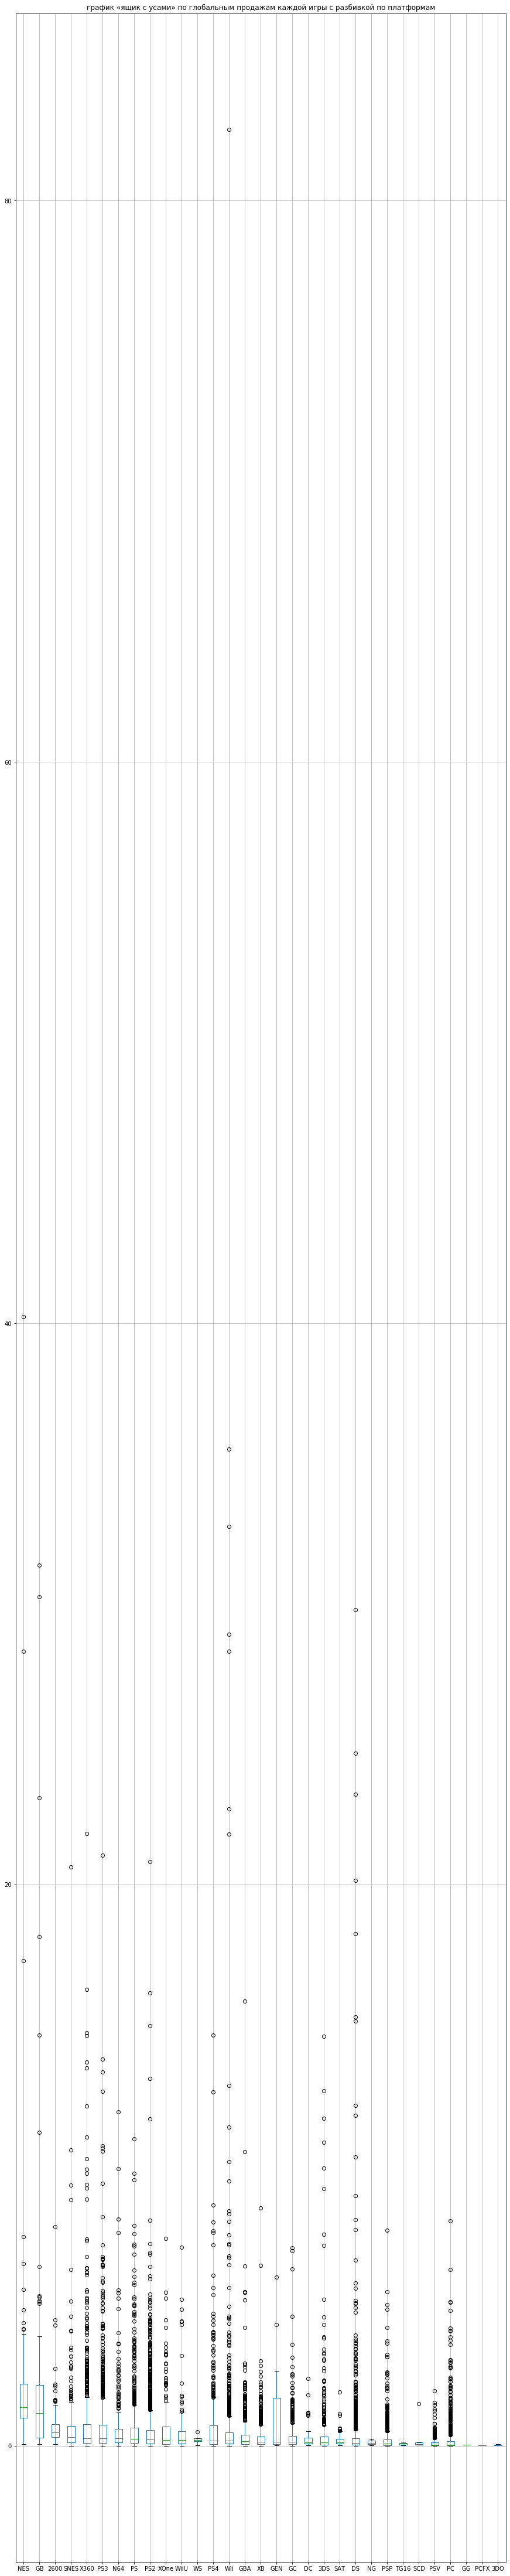

In [70]:
grouped = game_df.groupby(["platform"])

df2 = pd.DataFrame({col:vals['total_sales'] for col,vals in grouped})

meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]
df2.boxplot(figsize=(15,80))
plt.title('график «ящик с усами» по глобальным продажам каждой игры с разбивкой по платформам')

plt.show()


__Вывод__


Есть несколько платформ, которые не актуальны для нас, ибо в в глубоком прошлом они были и выпали из современных реалий, с заметно высоким средним по продажам игр, это легко объясняется тем, что выбор игр во время их бытности был беден и предоставлял малый выбор покупателю, поэтому люди брали одни и те же игры, тем самым повышая среднее. Есть также платформы со средним стремящимся к нулю, но они также нас не интересуют. У остальных - среднее отражает популярность платформ, совпадая с графиком 2, чем выше поднимается кривая - тем выше среднее, то есть - чем выше популярность платформы, тем выше среднее по продаже. 

Можно сказать, что разница в продажах велика, но нагляднее наблюдать за ней на том же графике 2. Добавить можно, что есть платформа - WS со средним равным таким гигантам как PS4 и Wii, даже чуть выше, но её продажи не велики.

Также мы видим, что есть МЕГАпопулярные игры, просто популярные, средние непримечательные игры и аутсайдеры.



__4.__

Далее посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Для этого подготовим данные. Возьмем срезы по выбранным платформам, актуальные платформы - PS4 and XOne, т.к. они лидеры на 2017 год.

Построим со срезов диаграммы рассеяния и воспользуемся методом corr()

In [71]:
ps4 = game_df.query('platform == "PS4"')

In [72]:
xone = game_df.query('platform == "XOne"')

In [73]:
xone.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,5.47,97.0,7.9,M


In [74]:
ps4.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M


In [75]:
ps4_critic = ps4[['total_sales','critic_score']]

In [76]:
xone_critic = xone[['total_sales','critic_score']]

In [77]:
ps4_critic = ps4_critic.query('critic_score != "NaN"')

In [78]:
xone_critic = xone_critic.query('critic_score != "NaN"')

In [79]:
xone_critic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 165 to 16660
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_sales   169 non-null    float64
 1   critic_score  169 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


In [80]:
ps4_critic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 42 to 16530
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_sales   252 non-null    float64
 1   critic_score  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [81]:
import seaborn
import matplotlib.pyplot as plt

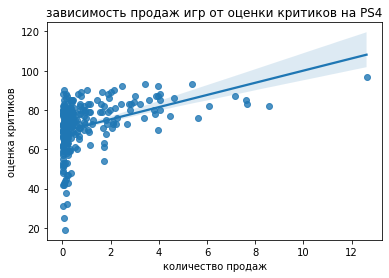

In [82]:
seaborn.regplot(x='total_sales', y='critic_score', data=ps4_critic)
plt.title("зависимость продаж игр от оценки критиков на PS4"); 
plt.xlabel("количество продаж")
plt.ylabel("оценка критиков")
plt.show()

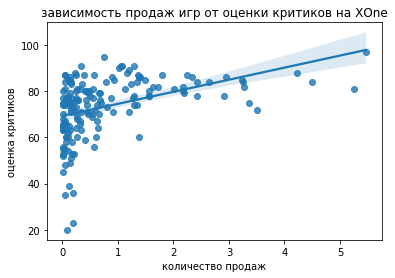

In [83]:
seaborn.regplot(x='total_sales', y='critic_score', data=xone_critic)
plt.title("зависимость продаж игр от оценки критиков на XOne"); 
plt.xlabel("количество продаж")
plt.ylabel("оценка критиков")
plt.show()

In [84]:
ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.235032,-0.021142,0.051916
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.928160,0.415008,0.030639
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.958157,0.346720,0.003444
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.527129,0.322358,0.187039
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.998051,0.409191,0.020080
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,1.000000,0.406568,0.023279
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,0.406568,1.000000,0.520752
user_score,0.051916,0.030639,0.003444,0.187039,0.020080,0.023279,0.520752,1.000000


In [85]:
xone.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,-0.239183,0.063712,-0.088927
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.970433,0.388636,0.068849
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.898045,0.379162,0.068502
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.452701,0.202954,0.096199
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.995238,0.411825,0.073846
total_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,1.000000,0.416998,0.074486
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,0.416998,1.000000,0.465368
user_score,-0.088927,0.068849,0.068502,0.096199,0.073846,0.074486,0.465368,1.000000


__Вывод__

На диагремме мы видим положительную зависимость между количеством продаж игры и её оценкой критиками. Иметод corr() выявляет эту зависимость = 0,4, то есть слабая зависимость (до 0,5 - слабая).

Таким образом отзывы критиков имеют зависимость с количеством продаж игры. Тенденция такова, что, чем выше оценка, тем вероятнее увеличение спроса.


Проделываю далее то же самое, только на этот раз с оценкой пользователей.

In [86]:
ps4_user = ps4[['total_sales','user_score']]

In [87]:
ps4_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_sales  392 non-null    float64
 1   user_score   263 non-null    float64
dtypes: float64(2)
memory usage: 9.2 KB


In [88]:
ps4_user = ps4_user.dropna()

In [89]:
xone_user = xone[['total_sales','user_score']]

In [90]:
ps4_user = ps4_user.astype({'user_score':'float'})

In [91]:
ps4_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 42 to 16530
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_sales  263 non-null    float64
 1   user_score   263 non-null    float64
dtypes: float64(2)
memory usage: 6.2 KB


In [92]:
xone_user = xone_user.dropna()

In [93]:
xone_user = xone_user.astype({'user_score':'float'})

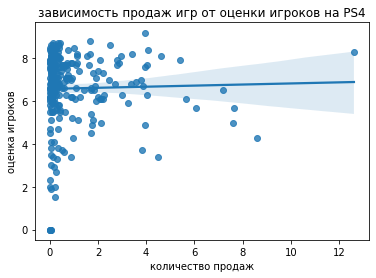

In [94]:
seaborn.regplot(x='total_sales', y='user_score', data=ps4_user)
plt.title("зависимость продаж игр от оценки игроков на PS4"); 
plt.xlabel("количество продаж")
plt.ylabel("оценка игроков")
plt.show()

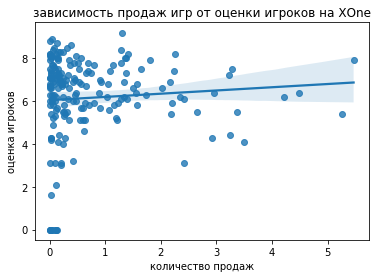

In [95]:
seaborn.regplot(x='total_sales', y='user_score', data=xone_user)
plt.title("зависимость продаж игр от оценки игроков на XOne"); 
plt.xlabel("количество продаж")
plt.ylabel("оценка игроков")
plt.show()

In [96]:
ps4_user.corr()

,total_sales,user_score
total_sales,1.000000,0.023279
user_score,0.023279,1.000000


In [97]:
xone_user.corr()

,total_sales,user_score
total_sales,1.000000,0.074486
user_score,0.074486,1.000000


__Вывод__

На диаграмме мы видим слабую, едва заметную зависимость между оценками пользователей и продаваемостью, слабее зависимости между оценками критиков и продаваемостью, критики более объективны, если можно оценивать объективность по степени зависимости.

Также и метод corr() говорит, что зависимость крайнеслабая.


__5.__

Посмотрим на общее распределение игр по жанрам. Выделим самые прибыльные жанры. 

Посмотрим в глобальном плане на распределение жанров.

In [98]:
game_df['genre'].value_counts(normalize=True)

Action          0.201107
Sports          0.140234
Misc            0.104658
Role-Playing    0.090063
Shooter         0.078813
Adventure       0.078631
Racing          0.074556
Platform        0.053393
Simulation      0.052116
Fighting        0.050900
Strategy        0.040927
Puzzle          0.034602
Name: genre, dtype: float64

самый популярный жанр - Action - 20% всех игр, наименее популярные - по 3-4% - Puzzle, Strategy, где меньше динамики, и больше требуется внимания и сосредоточенности.

Посмотрим какие жанры собирают больше всего продаж и меньше всего.

Для этого сгруппирую данные по жанру, значение - общее кол-во продаж за все годы.

In [99]:
genre_sale = game_df.pivot_table(index=['genre'], values='total_sales', aggfunc='sum')

In [100]:
genre_sale.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


Далее посмотрим среднее по покупаемым играм

In [101]:
genre_sale = game_df.pivot_table(index=['genre'], values='total_sales', aggfunc='mean')

In [102]:
genre_sale.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Platform,0.940262
Shooter,0.803519
Role-Playing,0.628683
Racing,0.590122
Sports,0.567940
Fighting,0.528865
Action,0.519057
Misc,0.459204
Simulation,0.452695


In [103]:
genre_sale = genre_sale.sort_values(by='total_sales', ascending=False)

Text(0.5, 1.0, 'популярность игровых жанров всех времён и народов')

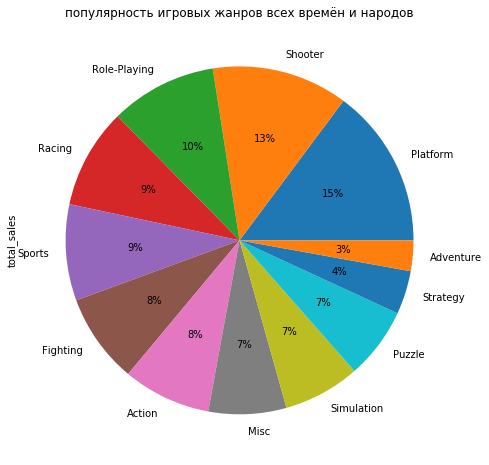

In [104]:
genre_sale.plot.pie(y='total_sales', figsize=(8,8), autopct='%1.0f%%', legend=False)
pylab.title ('популярность игровых жанров всех времён и народов')

__Вывод__

Если не разделять на регионы, то имеются популярные жанры, костяк с большими продажами и малопопулярные, т.к. мал спрос на них, именно мал спрос, Экшн - выпускает много игр, но средние продажи у него вдвое ниже, чем у Платформеров, которые выпускают вдвое меньше игр. Можно ли сказать, что Экшн и Платформер стояли бы на равных, если бы Платформеров выпускалось столько же, сколько и Экшена? Вопрос риторический. Но однозначно Шутер пользуется большей популярностью и спросом, нежели Платформер, т.к. при примерно равном количестве выпущенных игр у Шутера и среднее по продажам и общее выше, чем у Платформера, не смотря на Братьев Марио взорвавших мир своими сотнями миллионов продаж.

Спортивные игры пользуются хорошей популярностью.

Итак подытожим. Популярные жанры - Экшн, Спорт, Шутер.

Менее популярные - Приключение, Стратегии, Пазлы.

Остальные - посередине.



## Шаг 4. Составим портрет пользователя каждого региона

__Топ 5 платформ__

мы определили, что актуальный период начинается не ранее 2000 года, давайте посмотрим на совокупность данных с 2000 по 2016 и сравним с периодом за последние три года, когда новые платформы вытеснят прошлые поколения.

In [105]:
actual_time = game_df.query('year_of_release >= 2000')

In [106]:
actual_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14470 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int32  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   total_sales      14470 non-null  float64
 9   critic_score     7887 non-null   float64
 10  user_score       9738 non-null   float64
 11  rating           9663 non-null   object 
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


In [107]:
na_platf = actual_time.pivot_table(index=['platform'], values='na_sales', aggfunc='sum')
na_platf['%_of_all'] = (na_platf.na_sales / na_platf.na_sales.sum() * 100)

In [108]:
eu_platf = actual_time.pivot_table(index=['platform'], values='eu_sales', aggfunc='sum')
eu_platf['%_of_all'] = (eu_platf.eu_sales / eu_platf.eu_sales.sum() * 100)

In [109]:
jp_platf = actual_time.pivot_table(index=['platform'], values='jp_sales', aggfunc='sum')
jp_platf['%_of_all'] = (jp_platf.jp_sales / jp_platf.jp_sales.sum() * 100)

In [110]:
na_platf = na_platf.sort_values(by='na_sales', ascending=False)

In [111]:
eu_platf = eu_platf.sort_values(by='eu_sales', ascending=False)

In [112]:
jp_platf = jp_platf.sort_values(by='jp_sales', ascending=False)

Text(0.5, 1.0, 'популярность платформ среди пользователей Японии')

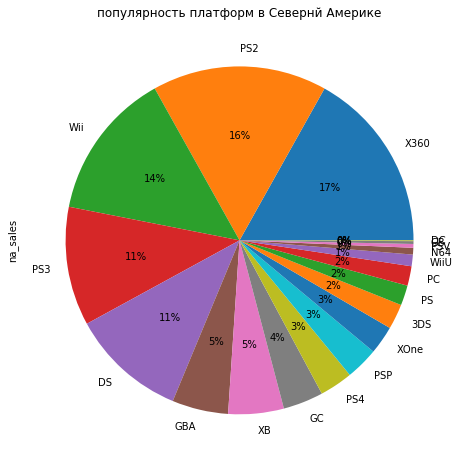

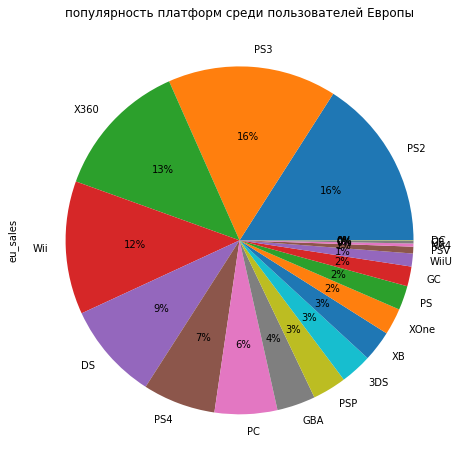

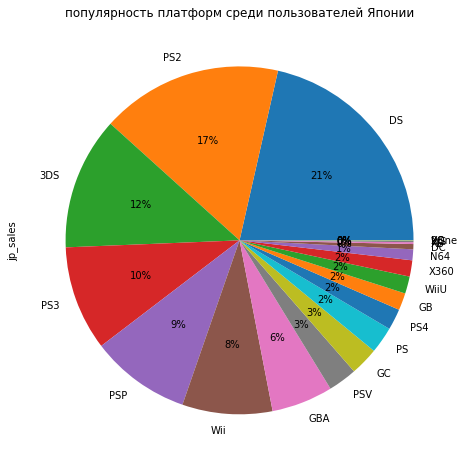

In [113]:
na_platf.plot.pie(y='na_sales', figsize=(8,8), autopct='%1.0f%%', legend=False)
pylab.title ('популярность платформ в Севернй Америке')

eu_platf.plot.pie(y='eu_sales', figsize=(8,8), autopct='%1.0f%%', legend=False)
pylab.title ('популярность платформ среди пользователей Европы')

jp_platf.plot.pie(y='jp_sales', figsize=(8,8), autopct='%1.0f%%', legend=False)
pylab.title ('популярность платформ среди пользователей Японии')


In [114]:
na_platf_top5 = na_platf.reset_index().head(5)
eu_platf_top5 = eu_platf.reset_index().head(5)
jp_platf_top5 = jp_platf.reset_index().head(5)

top5 = pd.concat([na_platf_top5, eu_platf_top5, jp_platf_top5], axis=1, sort=False)

In [115]:
top5

,platform,na_sales,%_of_all,platform,eu_sales,%_of_all,platform,jp_sales,%_of_all
0,X360,595.74,16.878352,PS2,332.63,15.948811,DS,175.00,21.450810
1,PS2,572.92,16.231822,PS3,327.21,15.688935,PS2,137.54,16.859111
2,Wii,486.87,13.793875,X360,268.32,12.865301,3DS,100.62,12.333603
3,PS3,390.13,11.053063,Wii,258.32,12.385825,PS3,79.41,9.733765
4,DS,380.31,10.774845,DS,188.41,9.033808,PSP,75.88,9.301071


Самые высокие продажи в Северной Америке. Тут нужно обратить внимание на размер населения, где больше людей, там и продаж больше. В С.Америке и Европе максимум популярности приходится на PS(2 и 3, Wii будет вытеснена скоро окончательно, мы пришли к такому выводу из анализа ранее) и X360, в Японии всё в корне иначе, там популярны портативные консоли - DS, 3DS, PSP и лишь между ними занимает место PS2, которая скоро уступит PS3.

Основываясь на графиках из шага 3, где мы видели, что к 2016 на пике останутся PS4 и XOne, можно точно сказать, что в С.Америке и Европе они будут занимать первые 2 места с сужественным отрывом от остальных. В Японии - новые поколения портативных консолей.

Давайте посмотрим как картина измениться, если мы возьмём последние 3 года - с 2013 по 2016. 3 года, а не 4 или 5 - чтобы убрать стёртость, которую будут давать прошлые поколения платформ, чьи сборы идут на спад, такие как Х360 и PS3.

In [116]:
actual_time2013 = game_df.query('year_of_release >= 2013')

In [117]:
na_platf = actual_time2013.pivot_table(index=['platform'], values='na_sales', aggfunc='sum')
na_platf['%_of_all'] = (na_platf.na_sales / na_platf.na_sales.sum() * 100)

eu_platf = actual_time2013.pivot_table(index=['platform'], values='eu_sales', aggfunc='sum')
eu_platf['%_of_all'] = (eu_platf.eu_sales / eu_platf.eu_sales.sum() * 100)

jp_platf = actual_time2013.pivot_table(index=['platform'], values='jp_sales', aggfunc='sum')
jp_platf['%_of_all'] = (jp_platf.jp_sales / jp_platf.jp_sales.sum() * 100)

In [118]:
na_platf = na_platf.sort_values(by='na_sales', ascending=False)

eu_platf = eu_platf.sort_values(by='eu_sales', ascending=False)

jp_platf = jp_platf.sort_values(by='jp_sales', ascending=False)

Text(0.5, 1.0, 'популярность платформ среди пользователей Японии')

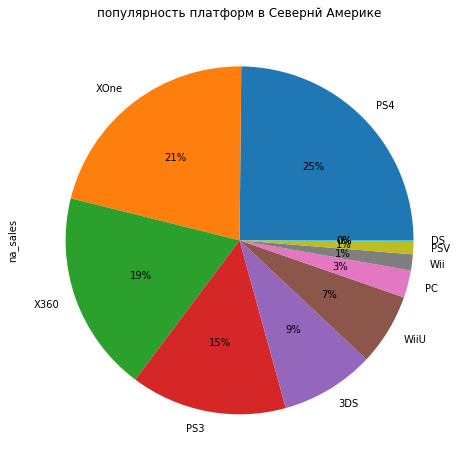

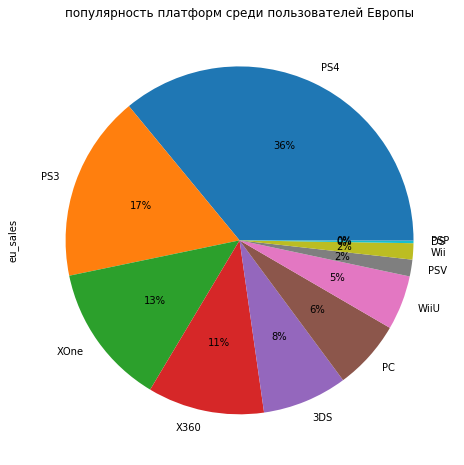

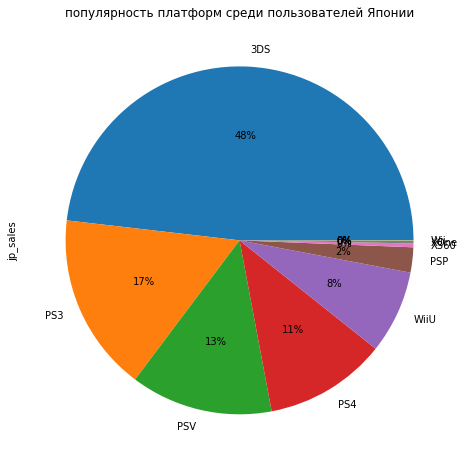

In [119]:
na_platf.plot.pie(y='na_sales', figsize=(8,8), autopct='%1.0f%%', legend=False)
pylab.title ('популярность платформ в Севернй Америке')

eu_platf.plot.pie(y='eu_sales', figsize=(8,8), autopct='%1.0f%%', legend=False)
pylab.title ('популярность платформ среди пользователей Европы')

jp_platf.plot.pie(y='jp_sales', figsize=(8,8), autopct='%1.0f%%', legend=False)
pylab.title ('популярность платформ среди пользователей Японии')

In [120]:
na_platf_top5 = na_platf.reset_index().head(5)
eu_platf_top5 = eu_platf.reset_index().head(5)
jp_platf_top5 = jp_platf.reset_index().head(5)

top5 = pd.concat([na_platf_top5, eu_platf_top5, jp_platf_top5], axis=1, sort=False)

In [121]:
top5

,platform,na_sales,%_of_all,platform,eu_sales,%_of_all,platform,jp_sales,%_of_all
0,PS4,108.74,24.842933,PS4,141.09,35.971241,3DS,67.81,48.167353
1,XOne,93.12,21.274360,PS3,67.81,17.288326,PS3,23.35,16.586163
2,X360,81.66,18.656188,XOne,51.59,13.152997,PSV,18.59,13.205001
3,PS3,63.50,14.507322,X360,42.52,10.840578,PS4,15.96,11.336838
4,3DS,38.20,8.727239,3DS,30.96,7.893328,WiiU,10.88,7.728371


Да, эти данные более актуальны.

В Европе серия консолей от PS полностью вытесниа серию XBox, и PS4 также лидирует в С.Америке. Рынок в Японии принадлежит исключительно, наверно можно так выразиться, 3DS, в Японии тенденция не меняется, предпочтение полностью отдаётся портативным консолям.

Из анализа шага 3 мы видели резкий спад продаж, и в С.Америке это видно особенно сильно, продажи С.А. и Европы почти сравнялись, хотя, если брать период с 2000 года, то С.А. в 2 раза превышала продажи в Европе.

__Топ-5  жанров.__

Предлогаю тут поступить также - посмотреть на данные с 2000 по 2016 и сравнить за период с 2013 по 2016.

In [122]:
na_genre = actual_time.pivot_table(index=['genre'], values='na_sales', aggfunc='sum')
na_genre = na_genre.sort_values(by='na_sales', ascending=False)

In [123]:
eu_genre = actual_time.pivot_table(index=['genre'], values='eu_sales', aggfunc='sum')
eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False)

In [124]:
jp_genre = actual_time.pivot_table(index=['genre'], values='jp_sales', aggfunc='sum')
jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False)

Text(0.5, 1.0, 'популярность жанров игр в Японии')

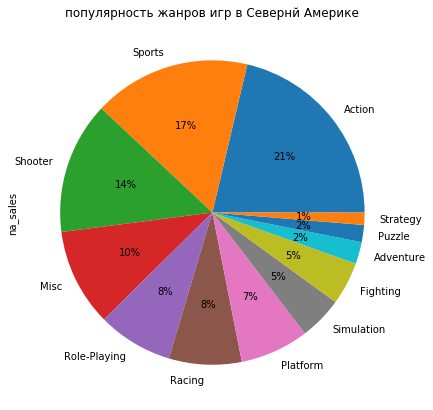

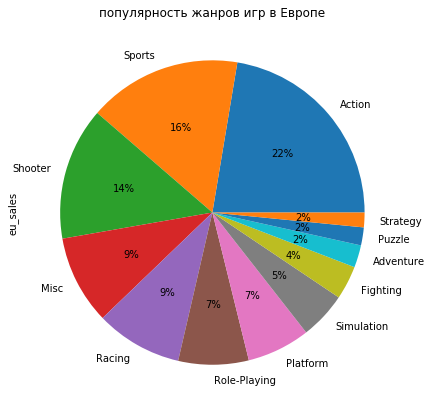

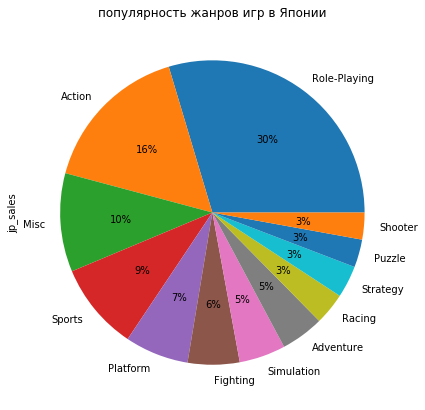

In [125]:

na_genre.plot.pie(y='na_sales', figsize=(7,7), autopct='%1.0f%%', legend = False)
pylab.title ('популярность жанров игр в Севернй Америке')

eu_genre.plot.pie(y='eu_sales', figsize=(7,7), autopct='%1.0f%%', legend = False)
pylab.title ('популярность жанров игр в Европе')

jp_genre.plot.pie(y='jp_sales', figsize=(7,7), autopct='%1.0f%%', legend = False)
pylab.title ('популярность жанров игр в Японии')

In [126]:
na_genre = actual_time2013.pivot_table(index=['genre'], values='na_sales', aggfunc='sum')
na_genre = na_genre.sort_values(by='na_sales', ascending=False)

eu_genre = actual_time2013.pivot_table(index=['genre'], values='eu_sales', aggfunc='sum')
eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False)

jp_genre = actual_time2013.pivot_table(index=['genre'], values='jp_sales', aggfunc='sum')
jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False)

Text(0.5, 1.0, 'популярность жанров игр в Японии')

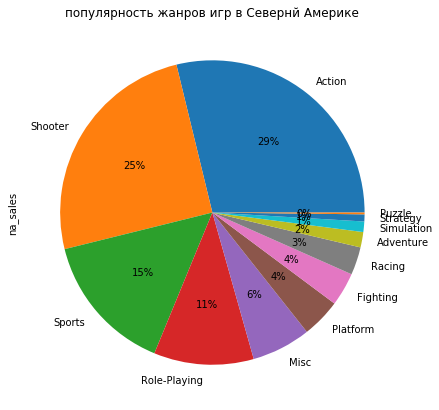

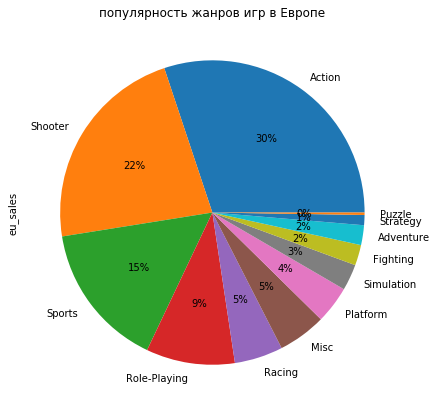

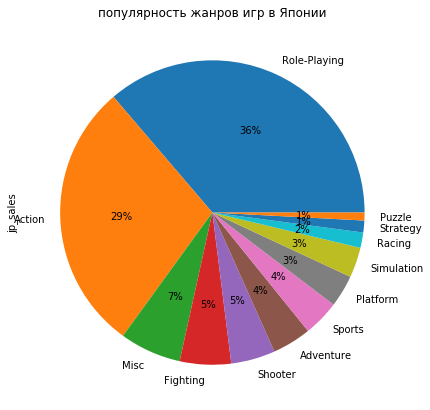

In [127]:
na_genre.plot.pie(y='na_sales', figsize=(7,7), autopct='%1.0f%%', legend = False)
pylab.title ('популярность жанров игр в Севернй Америке')

eu_genre.plot.pie(y='eu_sales', figsize=(7,7), autopct='%1.0f%%', legend = False)
pylab.title ('популярность жанров игр в Европе')

jp_genre.plot.pie(y='jp_sales', figsize=(7,7), autopct='%1.0f%%', legend = False)
pylab.title ('популярность жанров игр в Японии')

In [128]:


na_genre = na_genre.reset_index().head(5)
na_genre['%_of_all'] = (na_genre.na_sales / na_genre.na_sales.sum() * 100)

eu_genre = eu_genre.reset_index().head(5)
eu_genre['%_of_all'] = (eu_genre.eu_sales / eu_genre.eu_sales.sum() * 100)

jp_genre = jp_genre.reset_index().head(5)
jp_genre['%_of_all'] = (jp_genre.jp_sales / jp_genre.jp_sales.sum() * 100)

top5 = pd.concat([na_genre, eu_genre, jp_genre], axis=1, sort=False)

In [129]:
top5

,genre,na_sales,%_of_all,genre,eu_sales,%_of_all,genre,jp_sales,%_of_all
0,Action,126.05,33.617816,Action,118.13,36.497049,Role-Playing,51.04,44.386468
1,Shooter,109.74,29.267902,Shooter,87.86,27.144932,Action,40.49,35.211758
2,Sports,65.27,17.407654,Sports,60.52,18.698057,Misc,9.20,8.000696
3,Role-Playing,46.40,12.374983,Role-Playing,36.97,11.422127,Fighting,7.65,6.652752
4,Misc,27.49,7.331644,Racing,20.19,6.237835,Shooter,6.61,5.748326


Вкусы у разных культур не меняются во времени, по крайней мере 16 лет - недостаточно.

А дальше - интересно.

Вкус североамериканцев и европейцев в целом совпадают, но коренным образом отличаются от предпочтений японцев. Если у североамериканцев и европейцев шутер прочно стоит на 2 месте после action, то у японцев он опускается в самый низ топа - на 5ое место, а на первое поднимаются РПГ, а на чётвертое - жанр, который вовсе не входит в топ у белой нации - поединки, которые у японцев - 6,6%, в то время как у белых (надеюсь это не расизм, так просто проще и короче изъясняться, надеюсь, я всё ещё политкорректен) он составляет 4% у америкакнцев и 2% - у миролюбивых европейцев.

Можно сказать, что поклонников Action поровну во всех регионах. Это беспроигрышный вариант.

__Влияние рейтинга ESRB на продажи в разных отдельном регионах__

In [130]:
actual_time.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E


In [131]:
actual_time['rating'].value_counts()

E       3881
T       2859
M       1521
E10+    1392
EC         8
RP         1
AO         1
Name: rating, dtype: int64

In [132]:
actual_time['rating'].value_counts(normalize=True)

E       0.401635
T       0.295871
M       0.157405
E10+    0.144055
EC      0.000828
RP      0.000103
AO      0.000103
Name: rating, dtype: float64

In [133]:
actual_time2013['rating'].value_counts()

M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

In [134]:
actual_time2013['rating'].value_counts(normalize=True)

M       0.293790
T       0.265127
E       0.240446
E10+    0.200637
Name: rating, dtype: float64

До 2013 рынок новых игр предоставлял большее разнообразие рейтингов ESRB. Остался топ4, причём если до 2013 соотношение Е:Е:М:Е10+ было примерно 4:3:1.5:1.4, то стало примерно одинаково - 1:1:1:1.

Давайте посмотрим по регионам соотношение рейтинга, может в разных регионах продажи выше по разным рейтингам.

In [135]:
na_rating = actual_time.pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
na_rating['%_of_all'] = (na_rating.na_sales / na_rating.na_sales.sum() * 100)

In [136]:
na_rating.sort_values(by='na_sales', ascending=False)

,na_sales,%_of_all
rating,,
E,1249.26,41.158931
M,727.80,23.978571
T,709.86,23.387509
E10+,345.50,11.383067
EC,1.53,0.050408
AO,1.26,0.041513
RP,0.00,0.000000


In [137]:
eu_rating = actual_time.pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
eu_rating['%_of_all'] = (eu_rating.eu_sales / eu_rating.eu_sales.sum() * 100)

In [138]:
eu_rating.sort_values(by='eu_sales', ascending=False)

,eu_sales,%_of_all
rating,,
E,690.61,39.694793
M,472.40,27.152546
T,392.71,22.572135
E10+,183.33,10.537418
AO,0.61,0.035062
EC,0.11,0.006323
RP,0.03,0.001724


In [139]:
jp_rating = actual_time.pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
jp_rating['%_of_all'] = (jp_rating.jp_sales / jp_rating.jp_sales.sum() * 100)

In [140]:
jp_rating.sort_values(by='jp_sales', ascending=False)

,jp_sales,%_of_all
rating,,
E,189.91,45.328910
T,131.01,31.270288
M,57.84,13.805614
E10+,40.20,9.595188
AO,0.00,0.000000
EC,0.00,0.000000
RP,0.00,0.000000


Видим, что среди японцев меньшелюбителей игр «M» («Mature») — «Для взрослых», на 14% меньше, чем среди европейцев и на 11%, чем среди североамериканцев. Лидирует во всех регионах жанр "Е" - everyone - нейтральный жанр для аудитории от 6 лет.

Удостоверимся, что процент среди пользователей не изменился и в период 2013-2016.

In [141]:
na_rating2013 = actual_time2013.pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
na_rating2013['%_of_all'] = (na_rating2013.na_sales / na_rating2013.na_sales.sum() * 100)
na_rating2013.sort_values(by='na_sales', ascending=False)

,na_sales,%_of_all
rating,,
M,165.21,47.434609
E,79.05,22.696603
E10+,54.24,15.573229
T,49.79,14.295558


In [142]:
eu_rating2013 = actual_time2013.pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
eu_rating2013['%_of_all'] = (eu_rating2013.eu_sales / eu_rating2013.eu_sales.sum() * 100)
eu_rating2013.sort_values(by='eu_sales', ascending=False)

,eu_sales,%_of_all
rating,,
M,145.32,46.380697
E,83.36,26.605387
E10+,42.69,13.625048
T,41.95,13.388868


In [143]:
jp_rating2013 = actual_time2013.pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
jp_rating2013['%_of_all'] = (jp_rating2013.jp_sales / jp_rating2013.jp_sales.sum() * 100)
jp_rating2013.sort_values(by='jp_sales', ascending=False)

,jp_sales,%_of_all
rating,,
T,20.59,36.945990
E,15.14,27.166697
M,14.11,25.318500
E10+,5.89,10.568814


Изменились вкусы населения! 

Причем вкус североамериканцев и европейцев сменился схожим образом. Стали пользоваться популярностью игры с рейтингом "М", то есть - для взрослых, оттеснив "Е"-"для всех" на 2 место. Но и в Японии также, примерно схожим образом сменился интерес - жанр "Е" уступил жанру "Т" - («Teen») — «Подросткам»- от 13 лет и старше, также заняв второе место, но увеличился спрос и на жанр "М"-для взрослых на 12%, что ощутимо. Как объяснить? аудитория подросла? сменился дух времени?

Нужно также оговорить, что, сравнивая процентное содержание, мы не работаем с абсолютными значениями. Абсолютные значения резко сократились во всех жанрах.

__Общий вывод по шагу 4__

Культура североамериканцев и европейцев крайне схожи, общие предпочтения, которые проявляются и в выборе платформ для игр, и в выборе жанра игр, и рейтинг ESRB распределён также аналогично, но японцы стоят вдали, другая история, другой образ жизни, другая культура делают и другие предпочтения. Средний пользователь из С.Америки схож со средним игроком из Европы, их можно объединить и сравнивать со средним пользователем из Японии.

Так идёт расхождение в выборе платформ, до 2013 года американцы отдавали предпочтение производителю XBox, оно и ясно - их земляк, дешевле и "патриотичней", но после 2012 года японская PS начала вытеснять XBox и перегнала по продажам и значит в популярности, PS занимает первые места и в Европе. Что не скажешь о Японии, в которую XBox'у так и не суждено было попасть, их земляк - PS входит в топ, но резко уступает портативным, мобильным, компактным игровыым консолям, лидер - серия консолей DS, к 2016 - бесспорный лидер.

Аналогичным образом можно описать и предпочтение в жанрах игр. У североамериканцев и европейцев - это Экшт, Шутер, Спортивные игры, РПГ, а вот у японцев всё иначе - РПГ, Экшн, Misc, Поединки и Шутер, причем РПГ - явный лидер.

Рейтинг ESRB - нельзя сказать, что рейтинг влияет на продажу, можно сказать, что в период с 2000 по 2012 годы максимум продаж приходилось на на рейтинг "Е"-для всех, и это логично, т.к. больше всего игр производилось под этим знаком и аудитория больше - для всех.... но с 2013 количество выпущенных игр с рейтингом "Е" стало примерно равно играм с рейтингом "М" и "Т", даже чуть меньше (Е=302, М=369, Т=333, было Е=3881, М=1521, Т=2859), и количество проданных игр по рейтингу также примерно сравнялось, но вперед с незначительным отрывом вышли игры для более зрелой аудитории (за 00-16 гг.: Е=40%, М=15%, Т=29%, за 13-16гг: Е=24%, М=29%, Т=26%) из чего можно сделать вывод - что продают, то и покупают... Было игр с рейтингом Е в разы больше - больше и продавались, стали равны - примерно и равные продажи. Но если разделить по регионам, то увидим, что североамериканцы и европейцы предпочитают игры с маркировкой "М", то есть для взрослых - около 40%, японцы - "Т" и "Е".



## Шаг 5. Проверяю гипотезы

__Средние пользовательские рейтинги платформ Xbox One и PC одинаковые__

In [144]:
xbox_df = game_df.query('platform == "XOne"')
xbox_df = xbox_df[['user_score']]
xbox_df = xbox_df.dropna()

pc_df = game_df.query('platform == "PC"')
pc_df = pc_df[['user_score']]
pc_df = pc_df.dropna()

т.к. метод var(), высчитывающий дисперсию работает только с типом int, то я умножу оценку пользователей на 10, переведу в 100-бальную систему, суть не поменяется.

In [145]:
xbox_df = xbox_df.astype('float')
pc_df = pc_df.astype('float')

In [146]:
xbox_df = xbox_df * 10
pc_df = pc_df * 10

In [147]:
xbox_df = xbox_df.astype('int')
pc_df = pc_df.astype('int')

In [148]:
xbox_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 165 to 16672
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_score  193 non-null    int32
dtypes: int32(1)
memory usage: 2.3 KB


In [149]:
xbox_df

,user_score
165,79
179,54
242,64
270,62
373,41
...,...
16597,60
16630,82
16643,66
16660,67


In [150]:
len(pc_df)

804

In [151]:
len(xbox_df)

193

In [152]:
variance_xbox = np.var(xbox_df,ddof=1)
variance_xbox

user_score    409.542962
dtype: float64

In [153]:
variance_pc = np.var(pc_df,ddof=1)
variance_pc

user_score    506.684535
dtype: float64

дисперсии отличаются на 1,25 - что существенно, причем разброс значений на РС выше.

In [154]:
xbox_df.median()

user_score    66.0
dtype: float64

In [155]:
xbox_df.mean()

user_score    61.497409
dtype: float64

In [156]:
pc_df.median()

user_score    74.0
dtype: float64

In [157]:
pc_df.mean()

user_score    66.353234
dtype: float64

Прежде, чем выбирать метод для проверки гипотезы - посмотрим на распределение.

Text(0, 0.5, 'количество')

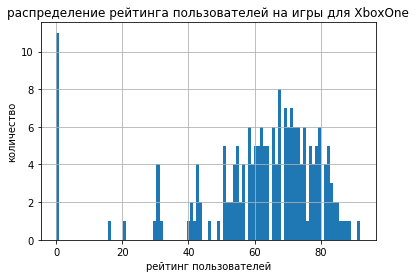

In [158]:
xbox_df.hist(bins=100)
plt.title('распределение рейтинга пользователей на игры для XboxOne')
plt.xlabel('рейтинг пользователей')
plt.ylabel('количество')

Text(0, 0.5, 'количество')

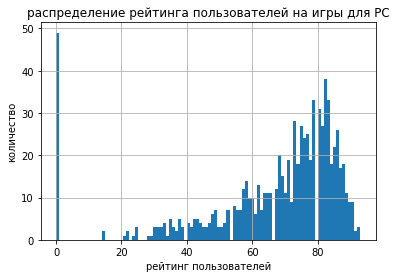

In [159]:
pc_df.hist(bins=100)
plt.title('распределение рейтинга пользователей на игры для PC')
plt.xlabel('рейтинг пользователей')
plt.ylabel('количество')

У обеих платформ схожий график. Распределение нормальное со скошенностью влево, причём скошенность больше для PC.

Я посмотрел на средние и медиану пользовательских рейтингов для игр на две платформы - РС и XOne

xbox_df.mean = 61,5 - средний пользовательский рейтинг на игры для платформы XOne

pc_df.mean = 66,4 - средний пользовательский рейтинг на игры для платформы РС

xbox_df.median = 66,0 - медиана пользовательского рейтинга на игры для платформы XOne

pc_df.median = 74,0 - медиана пользовательского рейтинга на игры для платформы РС

и строю __гипотезу__, что __средние отличаются__. Давайте проверим.

Чтобы проверить гипотезу об отличии среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind.

Мы имеем две выборки:

xbox_df - пользовательские рейтинги на игры для платформы XOne

pc_df - пользовательские рейтинги на игры для платформы PC

В работе мы будем считать,что дисперсии этих выборок отличаются, т.к. variance_pc = 506.7, a variance_xbox = 409.5, поэтому параметр equal_var = False.

А критический уровень статистической значимости (alpha) объявим равным 5%


In [160]:
alpha = .05
results = st.ttest_ind(xbox_df, pc_df, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: [0.0036704]
Не получилось отвергнуть нулевую гипотезу


Мы __не можем отвергнуть нулевую гипотезу__, что средние отличаются, т.к. вероятность того, что средние отличаются могла получится с вероятность в 0,3%, что очень маловероятно. Значит __средние пользовательские рейтинги платформ Xbox One и PC разные__.

__Средние пользовательские рейтинги жанров Action и Sports разные__

In [161]:
action = game_df.query('genre == "Action"')
action = action[['user_score']]
action = action.dropna()

sports = game_df.query('genre == "Sports"')
sports = sports[['user_score']]
sports = sports.dropna()

In [162]:
action = action.astype('float')
sports = sports.astype('float')

action = action * 10
sports = sports * 10

In [163]:
action = action.astype('int')
sports = sports.astype('int')

In [164]:
len(action)

2164

In [165]:
len(sports)

1487

In [166]:
variance_action = np.var(action,ddof=1)
variance_action

user_score    871.682684
dtype: float64

In [167]:
variance_sports = np.var(sports,ddof=1)
variance_sports

user_score    1150.417205
dtype: float64

дисперсии отличаются на 1,3 - что существенно, причем разброс значений на игры жанра Sports выше.

Посмотрим на распределение рейтинга игр 2х жанров.

Text(0, 0.5, 'количество')

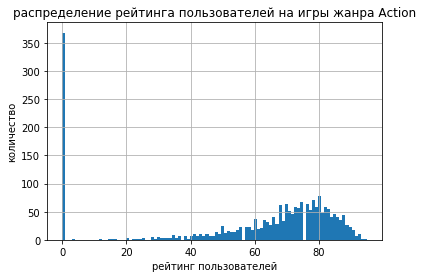

In [168]:
action.hist(bins=100)
plt.title('распределение рейтинга пользователей на игры жанра Action')
plt.xlabel('рейтинг пользователей')
plt.ylabel('количество')

Text(0, 0.5, 'количество')

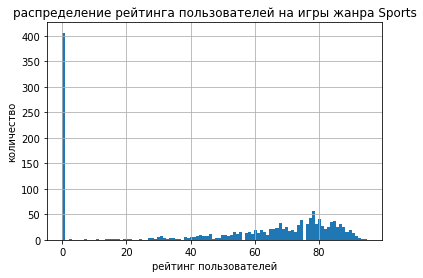

In [169]:
sports.hist(bins=100)
plt.title('распределение рейтинга пользователей на игры жанра Sports')
plt.xlabel('рейтинг пользователей')
plt.ylabel('количество')

Распаределение аналогичны друг другу - нормальные со скошенностью влево, как и в прошлом случае.

In [170]:
action.median()

user_score    70.0
dtype: float64

In [171]:
action.mean()

user_score    58.578558
dtype: float64

In [172]:
sports.median()

user_score    65.0
dtype: float64

In [173]:
sports.mean()

user_score    50.534633
dtype: float64

Я посмотрел на средние и медиану пользовательских рейтингов для 2х жанров - Action и Sports

action.mean = 58.6 - средний пользовательский рейтинг на игры жанра Action

sports.mean = 50.5 - средний пользовательский рейтинг на игры игры жанра Sports

action.median = 70.0 - медиана пользовательского рейтинга на игры игры жанра Action

sports.median = 65.0 - медиана пользовательского рейтинга на игры игры жанра Sports

и строю __гипотезу__, что __средние отличаются__. Давайте проверим.

Чтобы проверить гипотезу об отличии среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind.

Мы имеем две выборки:

action - пользовательские рейтинги на игры игры жанра Action

sports - пользовательские рейтинги на игры игры жанра Sports

В работе мы будем считать,что дисперсии этих выборок отличаются, т.к. variance_action = 871, a variance_sports = 1150, поэтому параметр equal_var = False.

А критический уровень статистической значимости (alpha) объявим равным 5%

In [174]:
alpha = .05
results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: [1.57479379e-13]
Не получилось отвергнуть нулевую гипотезу


__Отвергаем нулевую гипотезу__, что __средние отличаются__, т.к. p-значение слишком велико, с вероятностью в 157% то, что медианы и среднее отличны для двух жанров, произошло случайно. Абсолютно недостоверное наблюдение. __Нельзя сказать__, что __средние пользовательские рейтинги двух жанров - Action и Sports разные__.

## Шаг 6. Общий вывод.

Проект большой, выводов, наблюдений и замечаний много. Как их все собрать, уместить, ничего не потерять и лаконично изложить. Дело не из лёгких, но тем лучше - азарта больше возникает.

Главная моя задача:

Нужно выявить определяющие успешность игры __закономерности__. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

__Первая__, самая броская закономерность - на какую __платформу__ выпускается игра. На 2017 год наибольшую актуальность имеет PS4 и XOne (но в чуть меньшей степени, чем РS4), если речь идёт о североамериканцах и европейцах, чтобы игра пользовалась спросом в Японии, она должна быть на 3DS, меньшей популярностью (примерно в 2 раза) пользуется PSV and PS4 (хоть PS4 и уступает в продажах игр PS3, следуя закономерностям прошлых лет, продажи на ПС4 будут расти, а ПС3 падать).

__Вторая__ - конечно, __жанр__. 

Касательно североамериканцев и европейцев.

Экшн выпускает много игр и делает средние продажи по 1 игре, лишь суммарно по всем играм обгоняет другие жанры, есть вероятность, что рекламируемая игра может затеряться среди многообразия. Шутер - гораздо более привлекательный жанр в этом плане. Игр выпускаемых меньше, средняя продажа по игре выше и популярен. Также можно сделать ставку на Спортивные игры.

Касательно японцев.

Тут однозначно РПГ - беспроигрышный вариант. Игр немного, средние продажи хороши и крайне популярен в Японии.

__Третья__, менее очевидная и может менее определяющая - это __оценка критиков__.

Если есть сомнения между несколькими играми и на них уже есть отзывы критиков, то стоит выбрать ту, у которой оценка будет выше. 

__Четвёртая__, стоит обратить внимание на __рейтинг ESRB__.

Касательно североамериканцев и европейцев.

Больший процент покупателей выбирает игры со знаком "М" - для взрослых - около 50%. Стоит выбирать из списка игр с ограничением от 18 лет.

Касательно японцев.

Японцы же предпочитают игры со знаком "Т" - для лиц от 13 лет. Не просто представить, что взрослый человек будет проводить время за портативной консолью. Скорее целевая аудитория - подростки и тинейджеры, эти игры как раз доступны им.

__Post Scriptum:__ т.к. __продажи падают__, то не стоит надеяться, что они превысят порог 16г, среднее по продажам - не достигает и 0,5 млн. Не стоит сильно тратиться на рекламу, которая может не окупиться или принести не достаточно соизмеримый профит.
